$\newcommand{jX}{\mathcal{X}}$
$\newcommand{jE}{\mathcal{E}}$
$\newcommand{R}{\mathbb{R}}$

### Definitions

We embed $\R^n$ with a $p$-norm $||\cdot||$ for some $1 \leq p \leq \infty$.

- a *convex body* is a compact convex set with non-empty interior.
- a *convex polyhedron* is the intersection of a finite set of closed half-spaces. 
- a *convex polytope* is a bounded convex polyhedron. 
- we embed $\mathbb{R}^n$ with a norm, namely $||\cdot||$ is understood as the sup-norm (at any rate, remember that in a finite-dimensional space all norms are equivalent).

*Remark.* Although the following notions and algorithms also apply to the more general context of convex bodies, we are only interested in the case of convex polytopes.

### Asphericity at an interior point

Let $\mathcal{X} \subset \mathbb{R}^n$ be a convex polytope.

The **asphericity at $x$** is defined as the ratio of the circumradius to the inradius with common center $x$; more precisely:


**Def.** The **asphericity at point** $x \in \textrm{int }\mathcal{X}$ is:
$$
p_{\mathcal{X}}(x) := \dfrac{R(x)}{r(x)},
$$
where:

- circumradius: $$R(x) := \max_{y \in \mathcal{X}} ||x-y||$$ is the radius of the ball of center $x$ that contains $\mathcal{X}$ of minimal volume.
- inradius: $$r(x) := \min_{y \in \overline{\mathcal{X}^C}} ||x-y||$$
is the radius of the ball of center $x$ that is contained in $\mathcal{X}$ and is of maximal volume. 

### Asphericity of a convex polytope

The **asphericity of a polytope** $\mathcal{X}$ is defined as:
$$
p_{\mathcal{X}} := \min_{x \in \mathcal{X}} p_{\mathcal{X}}(x).
$$

Remarks: 

- intuition: $p_{\mathcal{X}}-1$ somehow measures the difference of $\mathcal{X}$ from a ball (in the given norm).
- complications:
    - $R(x)$ is convex, and $r(x)$ is concave.
    - $p_{\mathcal{X}}$ can be non-smooth, neither convex, nor concave.

### Computation: sequence of LP problems

**Theorem.** The asphericity can be approximated with arbitrary accuracy by the sequence of convex problems: 
$$
p_{\mathcal{X}}^{(k)}(x) := \min_{x \in \mathcal{X}} R(x) - \alpha_k r(x)
$$
where $\alpha_k := p^{(k)}_{\mathcal{X}}(x_k)$, and $x_{k+1} \in \mathcal{X}$ is the solution of the problem above. In the sup-norm, these reduces to a sequence of LP problems.



See: [Method for Finding an Approximate Solution of the Asphericity 
Problem for a Convex Body, S. I. Dudov and E. A. Meshcheryakova](http://sci-hub.cc/10.1134/s0965542513100059).

### Algorithm

We implement the computation of the asphericity of a convex polytope in the infinity norm. See [Dudov and Meshcheryakova 2013](http://link.springer.com/article/10.1134/S0965542513100059) for further details.

### Example

We created a program to compute the asphericity (in the sup-norm), given an input polytope $P$. The functions are on ``polyhedron_tools``.

To illustrate it, let's consider a random polygon with $10$ vertices, and find its asphericity. Then, we plot the original set and its bounding boxes at the aspericity center that was found.

In [1]:
%display typeset

In [2]:
from polyhedron_tools.polygons import random_polygon_2d

from polyhedron_tools.misc import BoxInfty

from polyhedron_tools.asphericity import asphericity_polytope, circumradius, inradius

In [17]:
# create a random polygon with 10 vertices
P = random_polygon_2d(10)

The algorithm requires an initial interior point $x_0$. We use as starting point the [Chebyshev center](https://en.wikipedia.org/wiki/Chebyshev_center) of the polytope.

In [20]:
from polyhedron_tools.misc import chebyshev_center

x0 = chebyshev_center(P)

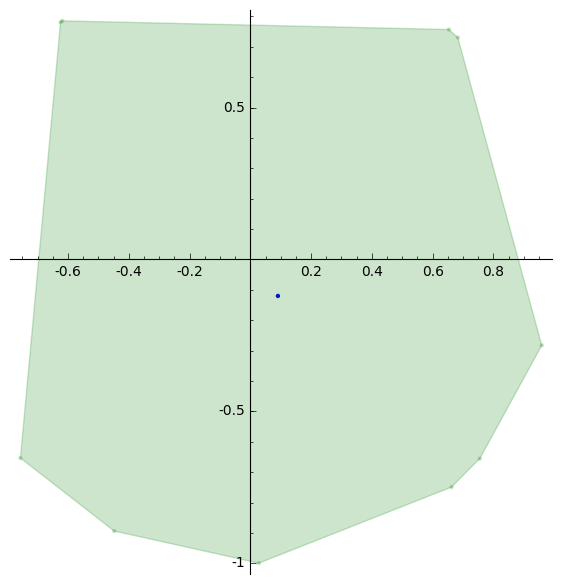

In [21]:
P.plot(alpha=0.2, color='green') + point(x0)

Next, we compute the asphericity and the corresponding center:

In [22]:
# compute asphericity
[asph, x_asph] = asphericity_polytope(P)
print 'The asphericity of P is : ', asph, ', with center of asphericity ', x_asph

The asphericity of P is :  1.41264318049 , with center of asphericity  (0.02206986652707576, -0.06248306721074004)


We plot the inner and outer boxes with respect to the asphericity center.

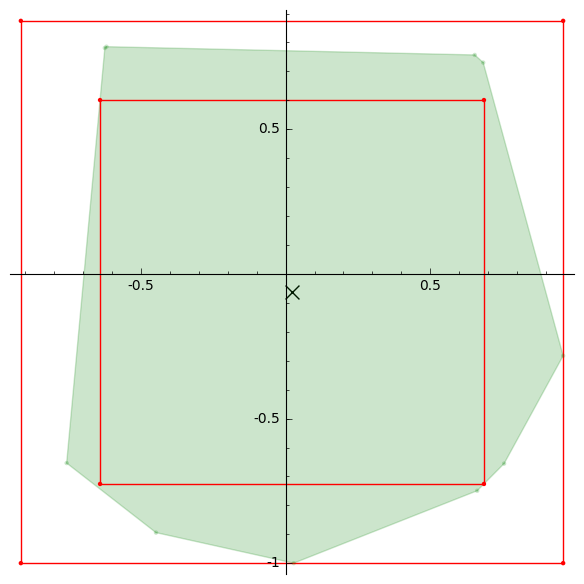

In [24]:
# add the initial set P together with the optimal point
examplePlot = P.plot(alpha=0.2,color='green') + point(x_asph, size=100,color='black',marker='x')

# add smallest box with center x_asph that contains P
examplePlot += BoxInfty(center=x_asph, radius=circumradius(P, x_asph)).plot(wireframe='red',fill=False)

# add biggest box with center x_asph that is contained in P
examplePlot += BoxInfty(center=x_asph, radius=inradius(P, x_asph)).plot(wireframe='red',fill=False)

examplePlot

#### Multi-dimensional case

The multidimensional case can be handled similarly, here are some examples.

In [47]:
P = polytopes.hypercube(6)

In [48]:
asphericity_polytope(random_matrix(QQ, 6) * P)

[16.321428571428573, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)]

In [31]:
P = polytopes.octahedron()

In [33]:
asphericity_polytope(P)

[3.0, (0.0, 0.0, 0.0)]